In [92]:
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('PlasticSales.csv')

In [3]:
data.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.tail()

,Month,Sales
55,2053-08-01,1608
56,2053-09-01,1528
57,2053-10-01,1420
58,2053-11-01,1119
59,2053-12-01,1013


In [5]:
m = pd.date_range(start='01-01-1949',periods=len(data),freq='M')

In [6]:
data['Month'] = m

In [7]:
data.head()

,Month,Sales
0,1949-01-31,742
1,1949-02-28,697
2,1949-03-31,776
3,1949-04-30,898
4,1949-05-31,1030


In [10]:
data.set_index('Month',inplace=True)

In [11]:
data.head()

,Sales
Month,
1949-01-31,742
1949-02-28,697
1949-03-31,776
1949-04-30,898
1949-05-31,1030


data.plot()
plt.show()

In [53]:
def PlotingData(data,RM,RS):
    plt.figure(figsize=(15,9))
    
    plt.plot(data,color='Blue',label='Data')
    plt.plot(RM,color='Blue',label='Rolling Mean')
    plt.plot(RS,color='Blue',label='Rolling STD')
    
    plt.xticks(fontsize=15,color='white')
    plt.yticks(fontsize=15,color='white')
    
    plt.show()

In [80]:
def DickeyFullerTest(data):
    
    rollingMean = data.rolling(12).mean()
    rollingStd = data.rolling(12).std()
    
    plt.figure(figsize=(15,9))
    plt.plot(data,color='black',label='Data')    
    plt.plot(rollingMean,color='Red',label='Mean')
    plt.plot(rollingStd,color='blue',label='Std')
    plt.legend()
    
    dft = adfuller(data,autolag='AIC')
    
    print('Test Statistics',dft[0])
    print('P - Value',dft[1])
    print('Lag Value',dft[2])
    print('No. of Observation',dft[3])
    
    for key,values in dft[4].items():
        print('Critical Value',key,'\t',values)

Test Statistics -0.7425639844129025
P - Value 0.8354143931554412
Lag Value 10
No. of Observation 49
Critical Value 1% 	 -3.5714715250448363
Critical Value 5% 	 -2.922629480573571
Critical Value 10% 	 -2.5993358475635153


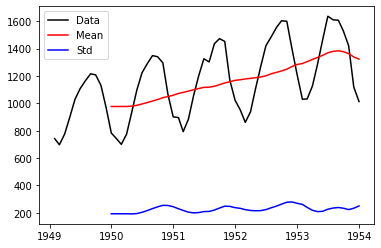

In [47]:
DickeyFullerTest(data)

In [48]:
## Taking log of the original data

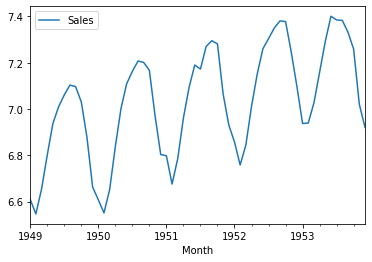

In [131]:
logData = np.log(data)

logData.plot()

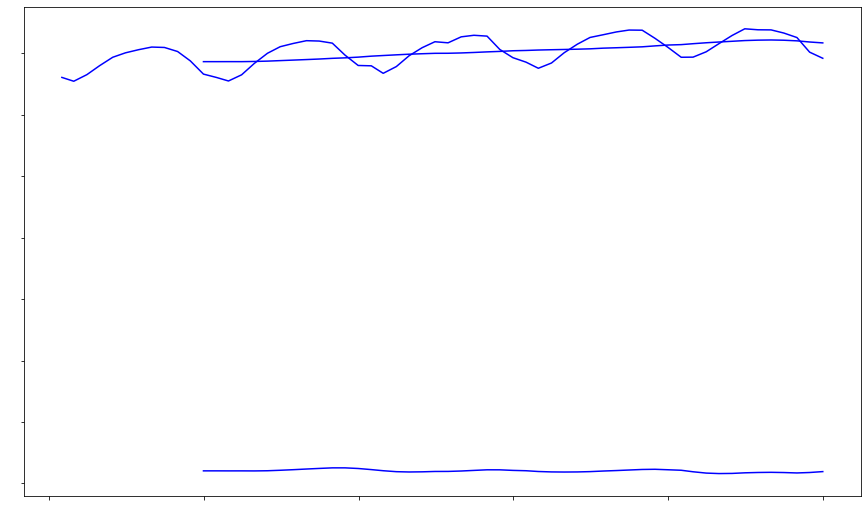

In [54]:
# Rolling Statistics
LogDataRollingMean = logData.rolling(12).mean()
LogDataRollingSTD = logData.rolling(12).std()

#ploting all the log data
PlotingData(logData,LogDataRollingMean,LogDataRollingSTD)

Test Statistics -5.5285289929700205
P - Value 1.8095434424509528e-06
Lag Value 5
No. of Observation 43
Critical Value 1% 	 -3.5925042342183704
Critical Value 5% 	 -2.931549768951162
Critical Value 10% 	 -2.60406594375338


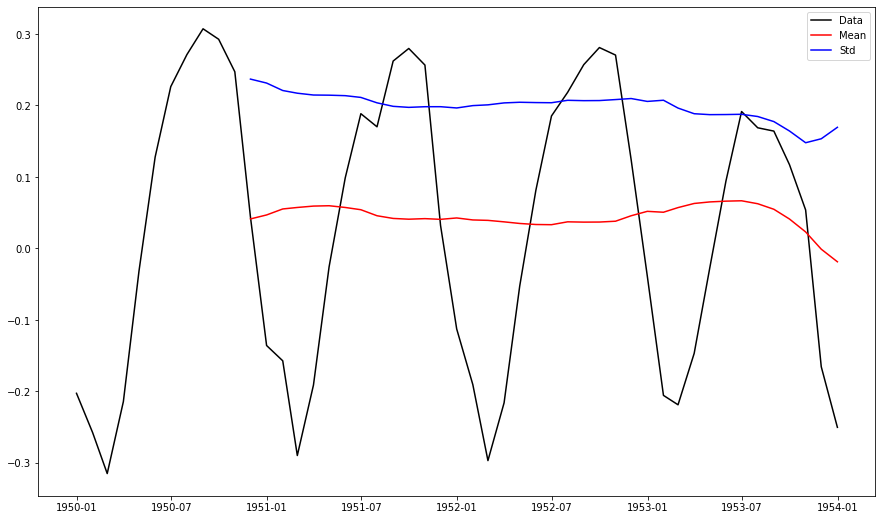

In [57]:
RollingLogData = logData-LogDataRollingMean

RollingLogData = RollingLogData.dropna()

#Checking the Stationarity with Dickey Fuller Test

DickeyFullerTest(RollingLogData)


In [58]:
# Now taking the Exponent Weighted Moving Average

In [63]:
ewma = logData.ewm(12).mean()
ewmStd = logData.ewm(12).std()

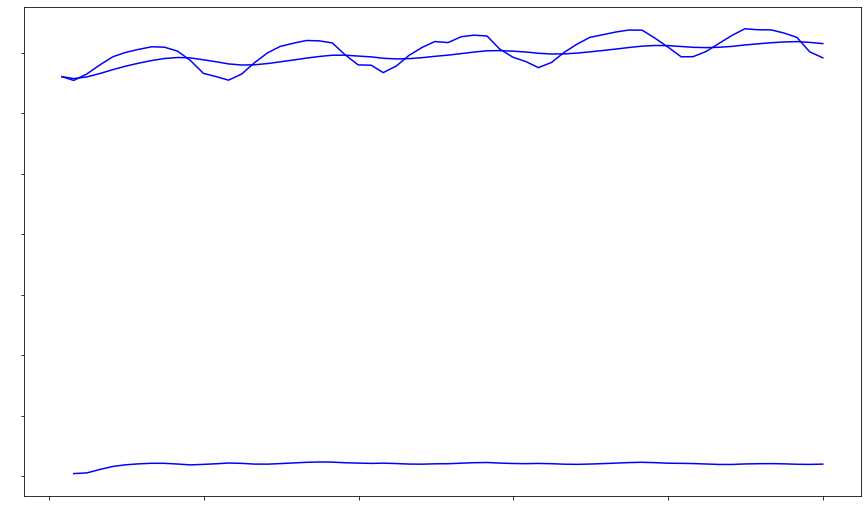

In [64]:
PlotingData(logData,ewma,ewmStd)

Test Statistics -5.789299235792981
P - Value 4.914916420348819e-07
Lag Value 5
No. of Observation 54
Critical Value 1% 	 -3.55770911573439
Critical Value 5% 	 -2.9167703434435808
Critical Value 10% 	 -2.59622219478738


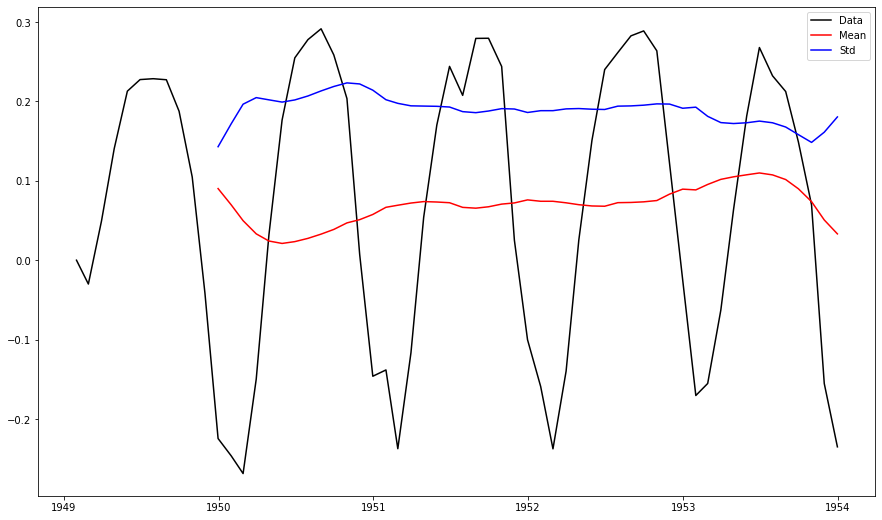

In [65]:
Finalewma = logData - ewma

Finalewma = Finalewma.dropna()

DickeyFullerTest(Finalewma)

In [69]:
# taking the shift value by 1

ShiftLogData = logData.shift(1)



Test Statistics -0.8096644464206065
P - Value 0.8162667125730252
Lag Value 11
No. of Observation 47
Critical Value 1% 	 -3.5778480370438146
Critical Value 5% 	 -2.925338105429433
Critical Value 10% 	 -2.6007735310095064


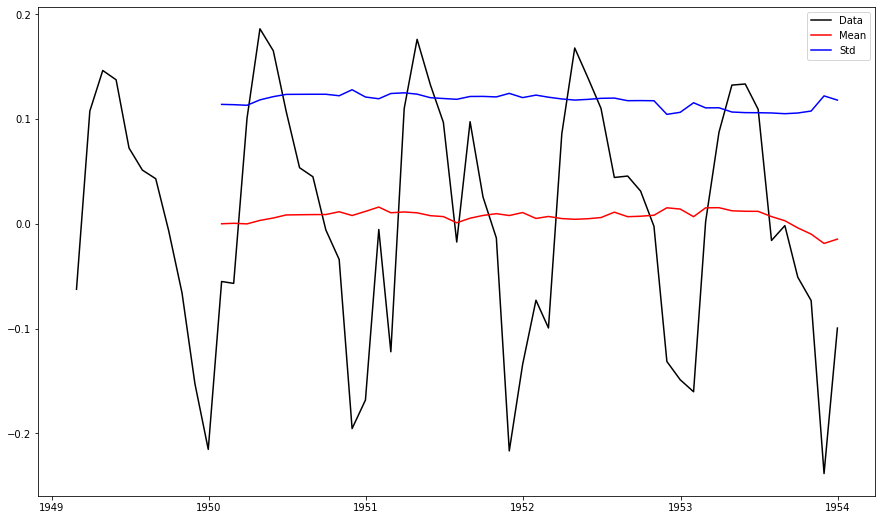

In [70]:
# integrating shift value

I = logData - ShiftLogData
I = I.dropna()
DickeyFullerTest(I)

In [73]:
decomposition = seasonal_decompose(logData)

In [75]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

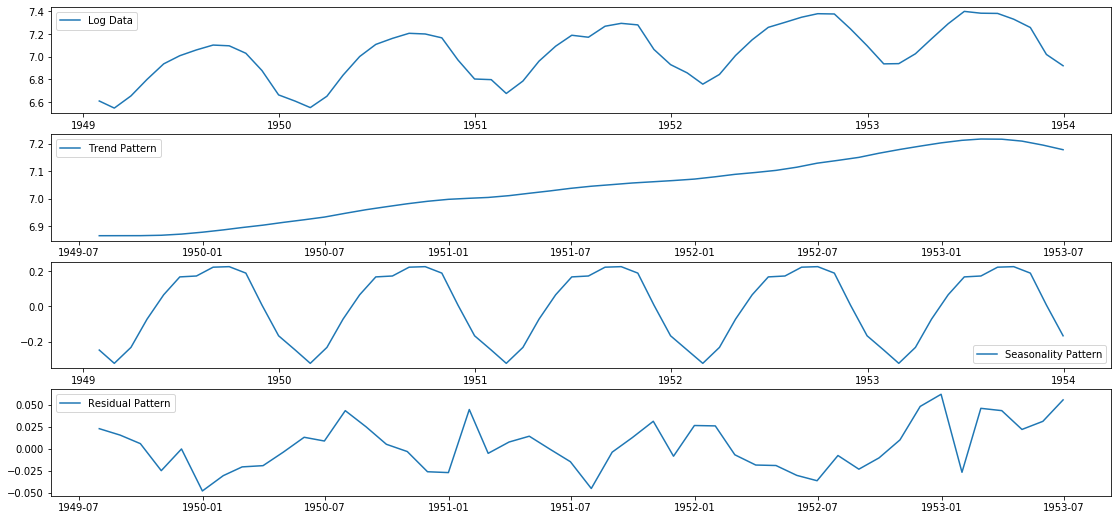

In [77]:
plt.figure(figsize=(19,9))

plt.subplot(411)
plt.plot(logData,label = 'Log Data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = 'Trend Pattern')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality,label = 'Seasonality Pattern')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = 'Residual Pattern')
plt.legend(loc='best')

plt.show()

Test Statistics -4.138162674790251
P - Value 0.0008370244245030603
Lag Value 0
No. of Observation 47
Critical Value 1% 	 -3.5778480370438146
Critical Value 5% 	 -2.925338105429433
Critical Value 10% 	 -2.6007735310095064


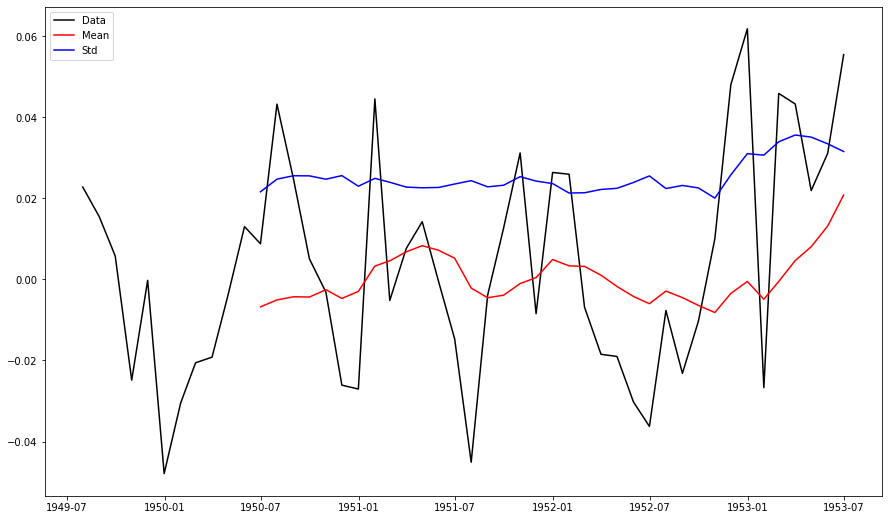

In [81]:
residual = residual.dropna()
DickeyFullerTest(residual)

In [82]:
acfData = acf(I,20)
pacfData = pacf(I,20,'OLS')

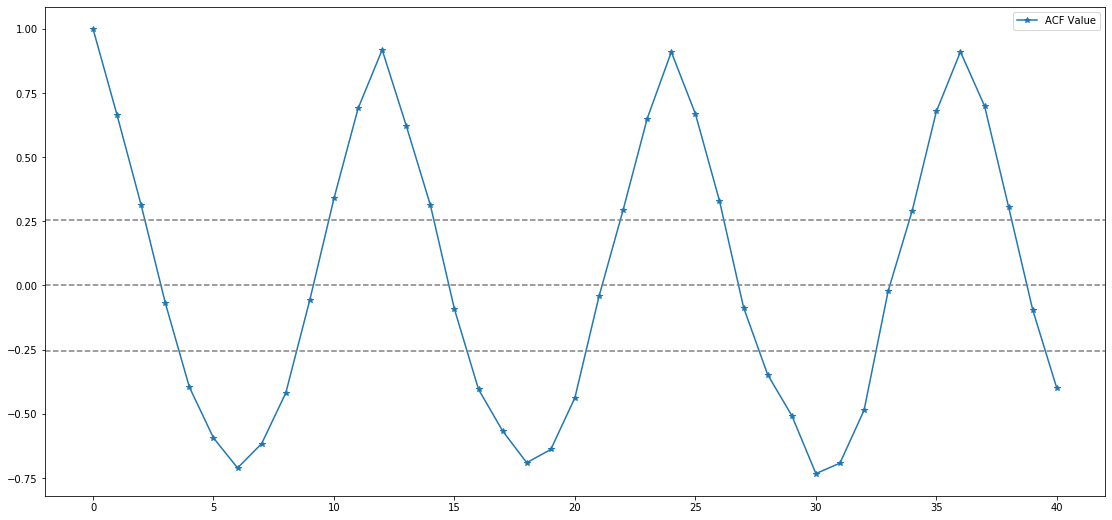

In [111]:
plt.figure(figsize=(19,9))

plt.plot(acfData,label='ACF Value',marker='*')

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(I)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(I)),linestyle='--',color='gray')

#plt.xticks(ticks=[0,1,2,3])

plt.legend(loc='best')
plt.show()

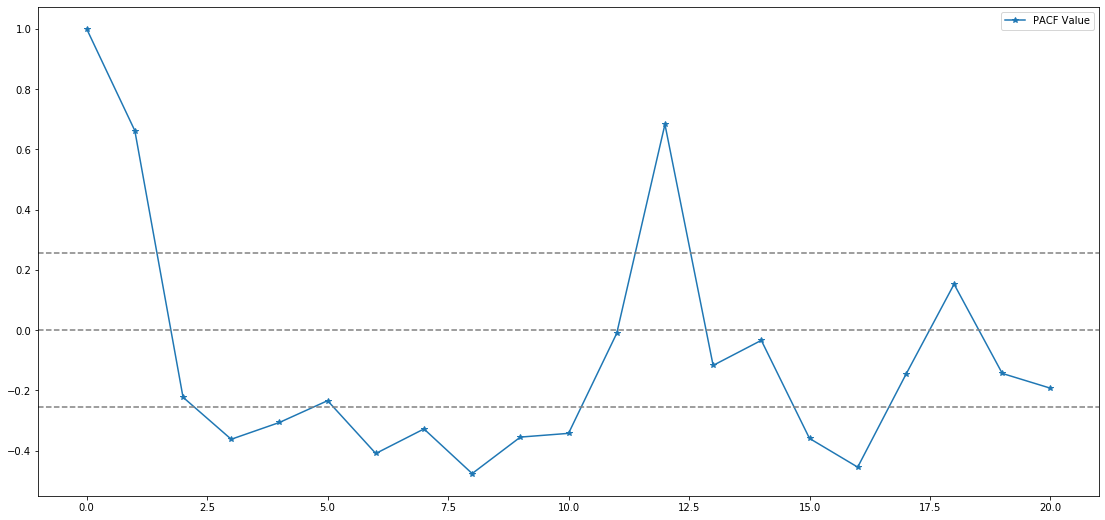

In [112]:
plt.figure(figsize=(19,9))

plt.plot(pacfData,label='PACF Value',marker='*')

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(I)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(I)),linestyle='--',color='gray')

#plt.xticks(ticks=[0,1,2,3,4])
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'RSS: 0.4019')

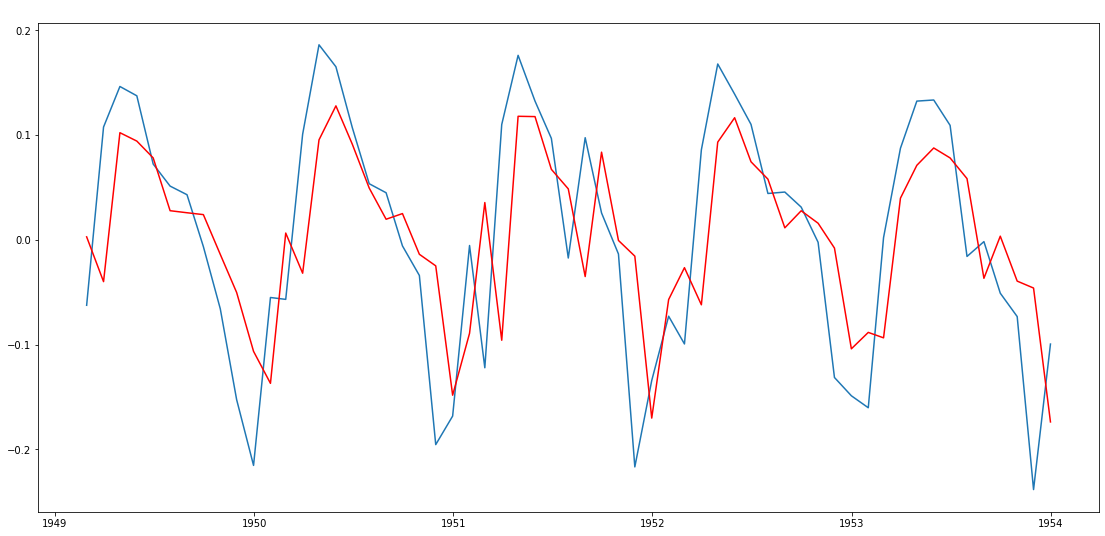

In [115]:
# RA Model
model = ARIMA(logData, order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(19,9))
plt.plot(I)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-I['Sales'])**2),color='white')

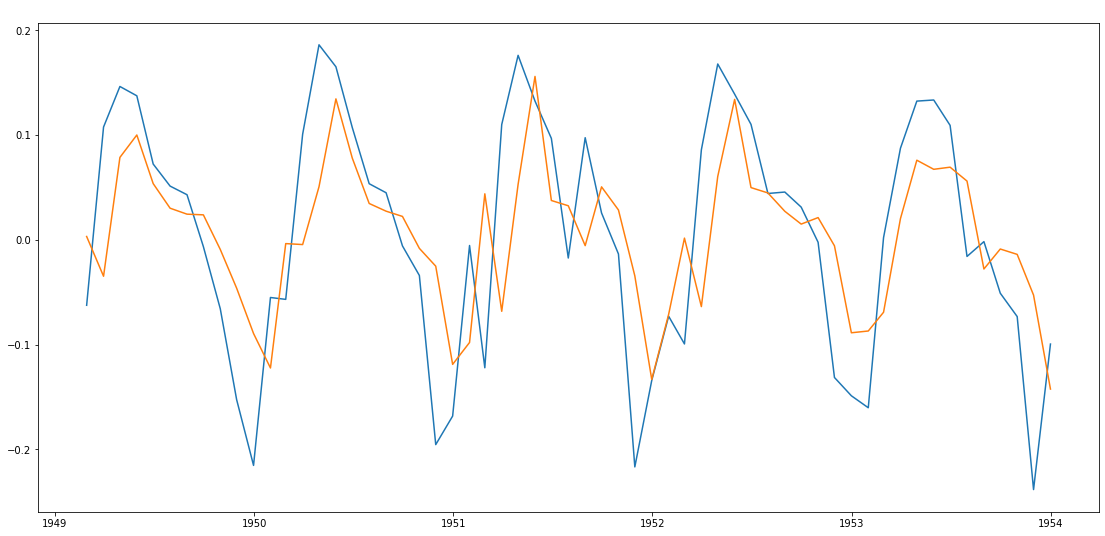

In [114]:
# AR Model
model = ARIMA(logData,order=(0,1,2))
arima_model = model.fit(disp=-1)

plt.figure(figsize=(19,9))
plt.plot(I)
plt.plot(arima_model.fittedvalues)
plt.title('RSS %.4f'%sum((arima_model.fittedvalues-I['Sales'])**2),color='white')

plt.show()

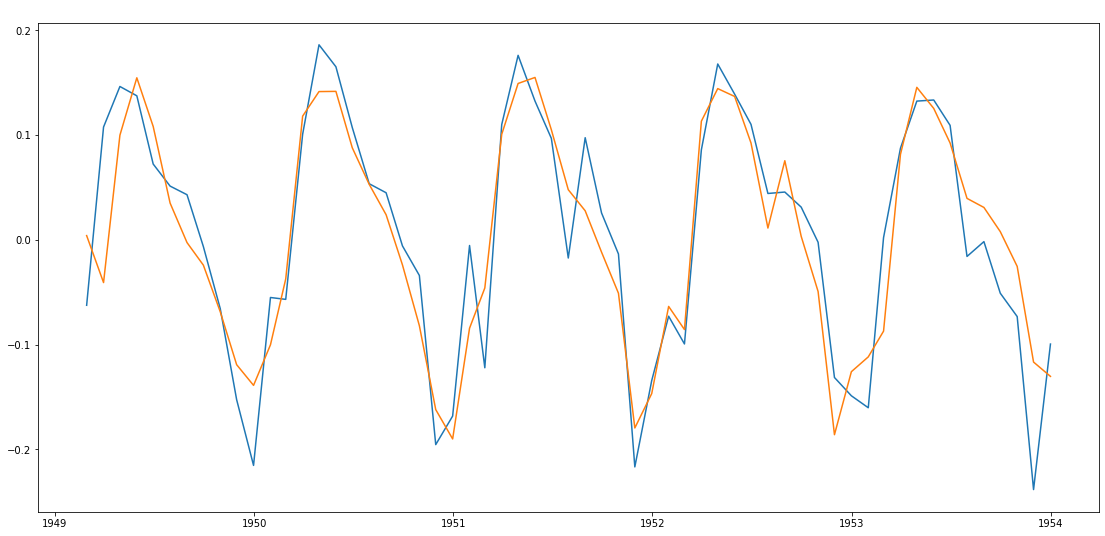

In [182]:
# ARIMA Model
model = ARIMA(logData, order=(12, 1, 1)) 
arima_model = model.fit(disp=-1)

plt.figure(figsize=(19,9))
plt.plot(I)
plt.plot(arima_model.fittedvalues)
plt.title('RSS %.4f'%sum((arima_model.fittedvalues-I['Sales'])**2),color='White')
plt.show()

In [183]:
fitted_arima = pd.Series(arima_model.fittedvalues,copy=True)

fitted_arima.head()

Month
1949-02-28    0.003879
1949-03-31   -0.040899
1949-04-30    0.099589
1949-05-31    0.154309
1949-06-30    0.107930
dtype: float64

In [184]:
fitted_arima_cumsum = fitted_arima.cumsum()

fitted_arima_cumsum.head()

Month
1949-02-28    0.003879
1949-03-31   -0.037020
1949-04-30    0.062569
1949-05-31    0.216878
1949-06-30    0.324807
dtype: float64

In [185]:
fitted_arima_log = pd.Series(logData.iloc[0:,0:].values.flatten(),index = logData.index)

fitted_arima_log = fitted_arima_log.add(fitted_arima_cumsum,fill_value=0)

fitted_arima_log.head()

Month
1949-01-31    6.609349
1949-02-28    6.550664
1949-03-31    6.617133
1949-04-30    6.862739
1949-05-31    7.154192
dtype: float64

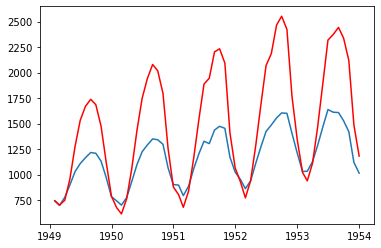

In [187]:
exp_arima = np.exp(fitted_arima_log)

plt.plot(data)
plt.plot(exp_arima,color='Red')


In [194]:
data.shape

(60, 1)

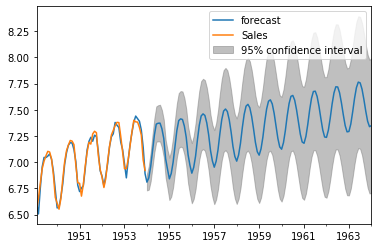

In [195]:
# predicting for 10 years 12months * 10 years = 120
arima_model.plot_predict(1,180)
pred = arima_model.forecast(steps = 120)